In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Hourly_Metered_Volumes_and_Pool_Price_and_AIL.csv")
df["Date"] = pd.to_datetime(df["Date_Begin_Local"])
df.set_index("Date", inplace=True)


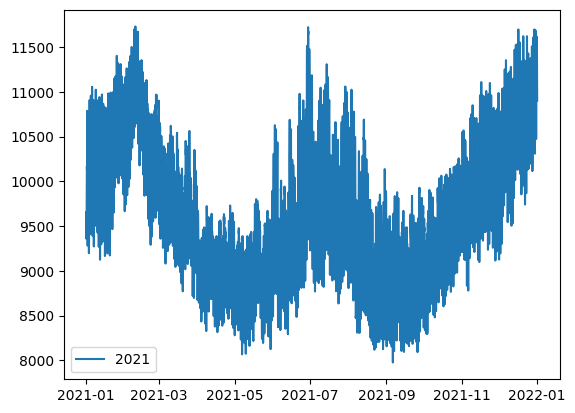

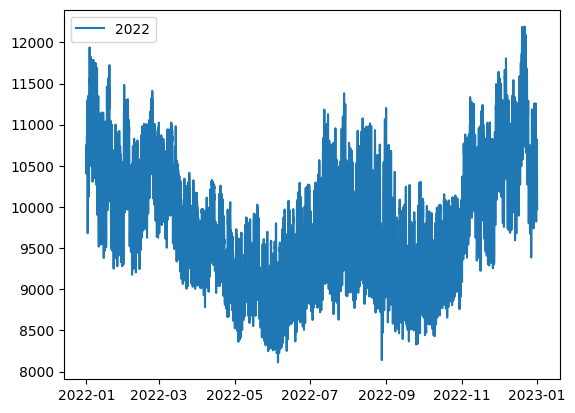

In [4]:
# print(df.columns)

# df_daily_pool_avg = df.set_index("Date").resample('D').mean()


AIL_hourly_2021 = df[df.index.year == 2021]
AIL_hourly_2022 = df[df.index.year == 2022]


plt.plot(
    AIL_hourly_2021.index,
    AIL_hourly_2021.ACTUAL_AIL,
    label="2021",
)
plt.legend()
plt.show()
plt.plot(
    AIL_hourly_2022.index,
    AIL_hourly_2022.ACTUAL_AIL,
    label="2022",
)
plt.legend()


18:23:24 - cmdstanpy - INFO - Chain [1] start processing
18:23:27 - cmdstanpy - INFO - Chain [1] done processing


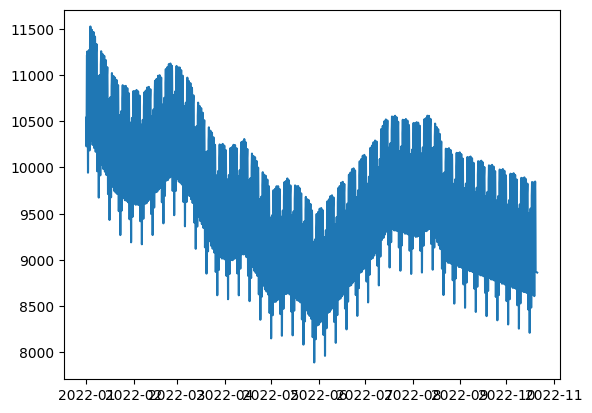

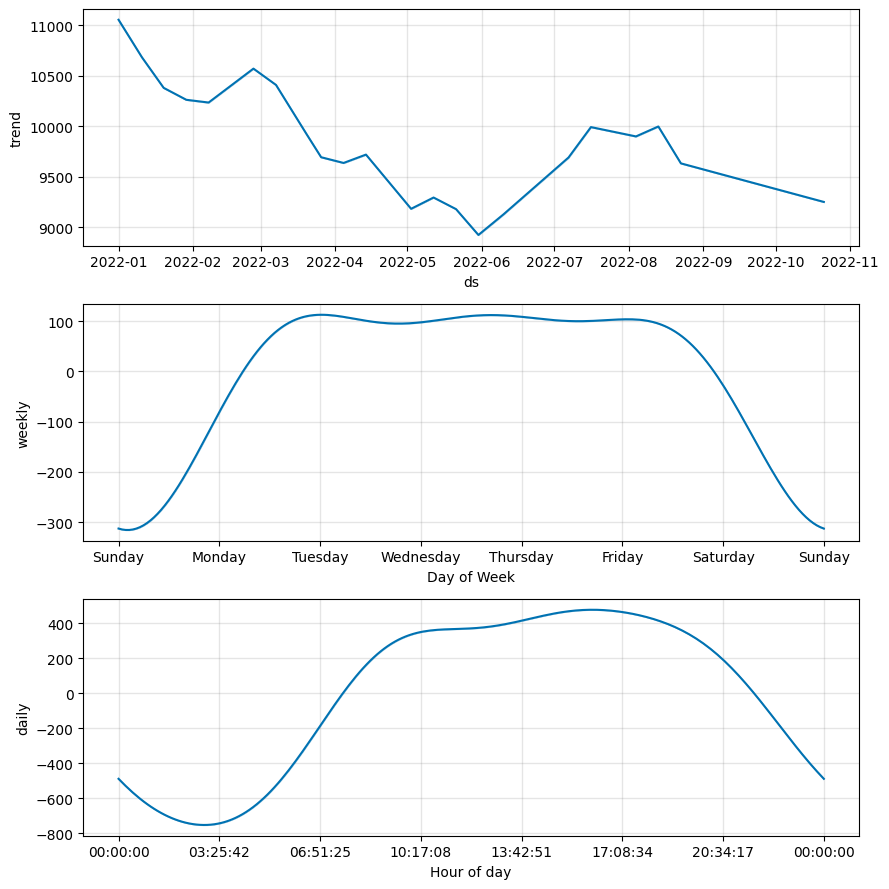

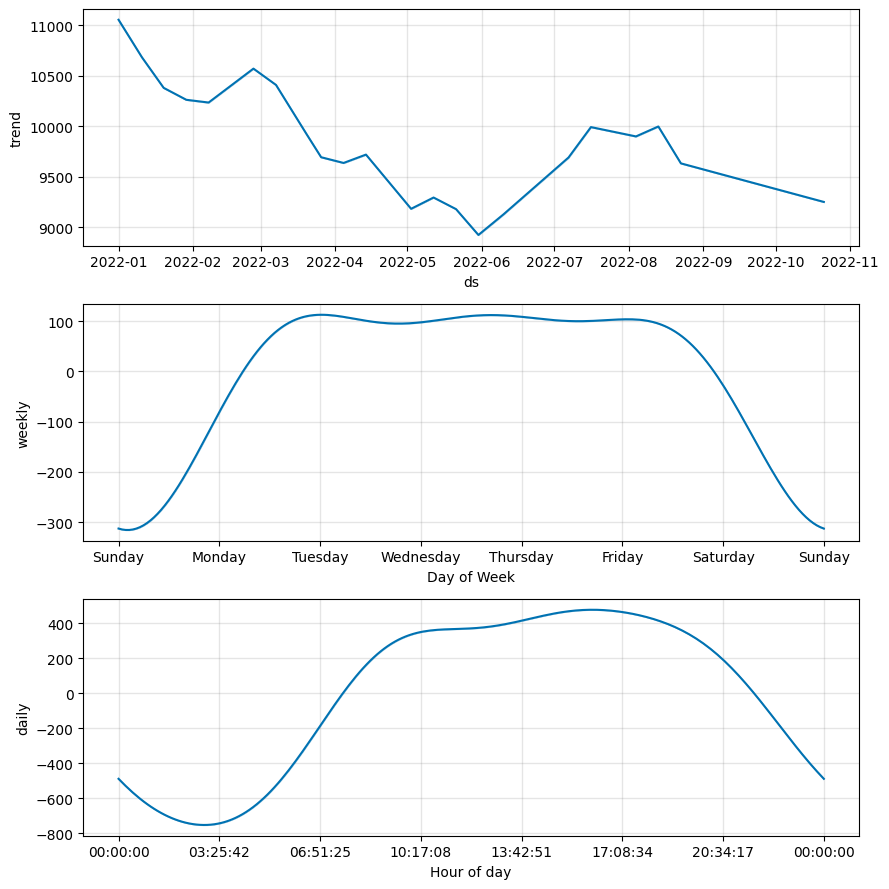

In [5]:
from prophet import Prophet
import logging
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

train_data, test_data = train_test_split(AIL_hourly_2022, test_size=0.2, shuffle=False)

logging.getLogger("prophet").setLevel(logging.ERROR)
warnings.filterwarnings("ignore")

m = Prophet()

data = train_data
data["ds"] = train_data.index
data["y"] = train_data.ACTUAL_AIL

m.fit(data)

future_dates = m.make_future_dataframe(periods=1)
predictions = m.predict(future_dates)
predictions
plt.plot(future_dates, predictions.yhat)
plt.show()
m.plot_components(predictions)
